<a href="https://colab.research.google.com/github/Qind1609/ImgProcessing-Pytorch-CNN/blob/main/CNN_AlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
ROOT = "/content/drive"
drive.mount(ROOT)

import os
from os.path import join

PROJ = "MyDrive/T.A/b3/cat_vs_fish"

PROJECT_PATH = join(ROOT,PROJ)

print(PROJECT_PATH)

Mounted at /content/drive
/content/drive/MyDrive/T.A/b3/cat_vs_fish


#Convolutional Neural Networks


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data
import torch.nn.functional as F
import torchvision
from torch.hub import
from torchvision import transforms
from PIL import Image

## CNNNet-AlexNet

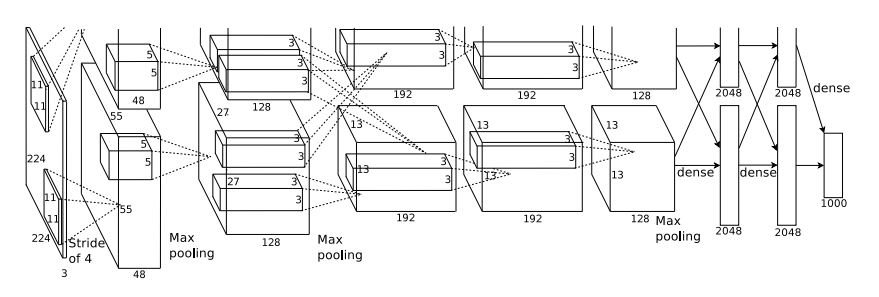

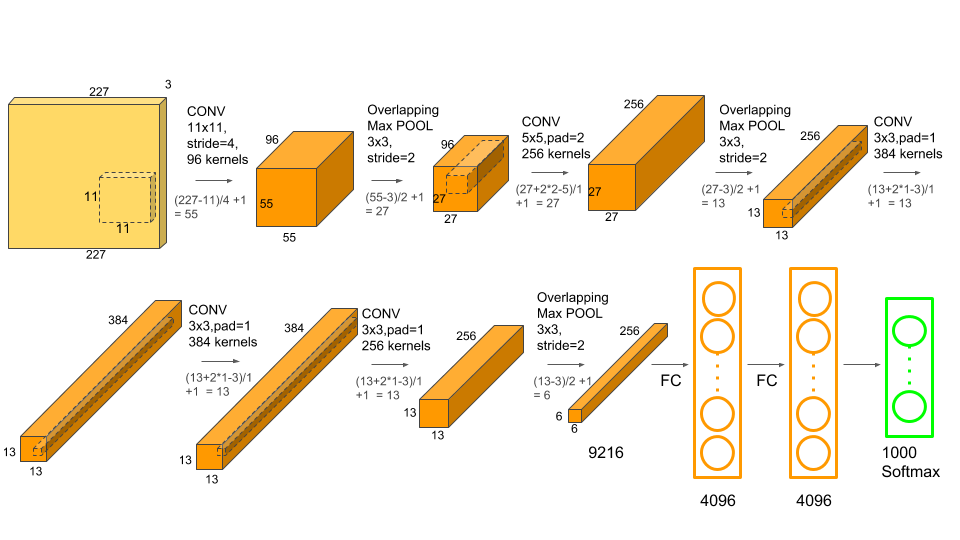

Mạng AlexNet bao gồm 8 lớp (tính luôn lớp input là 9), bao gồm:

Input: có kích thước 227x227x3 (Scale ảnh đầu vào về dạng 227x227x3, thực chất ảnh của tập ImageNet có size tùy ý)

**Lớp thứ nhất:**
Convolution Layer có kích thước 96 kernel (11x11x3) với stride size = 4 và pad = 0. Kết quả sau bước này ta được tập feature map có kích thước 55x55x96. (227-11)/4 + 1 = 55 feature cho 1 phương 

Tiếp theo là một Overlapping Max Pooling **3x3 có stride =2** => feature maps = 27x27x96. (55-3)/3 +1 = 27

Tiếp theo là Local Response Normalization => feature maps = 27x27x96.



**Overlapping Max Pooling**
Max Pooling layer thường được sử dụng để giảm chiều rộng và chiều dài của một tensor nhưng vẫn giữ nguyên chiều sâu. Overlapping Max Pool layer cũng tương tự như Max Pool layer, ngoại trừ việc là một window của bước này sẽ có một phần chồng lên window của bước tiếp theo. Tác giả sử dụng pooling có kích thước 3x3 và bước nhảy là 2 giữa các pooling => overlap 1 pixel

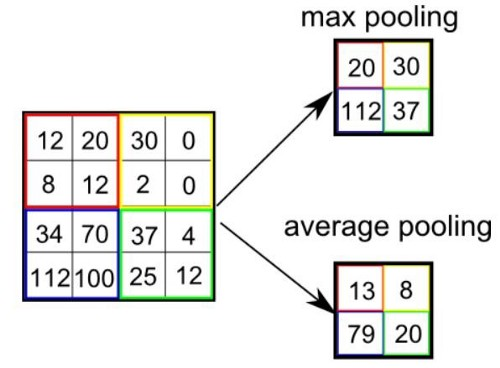



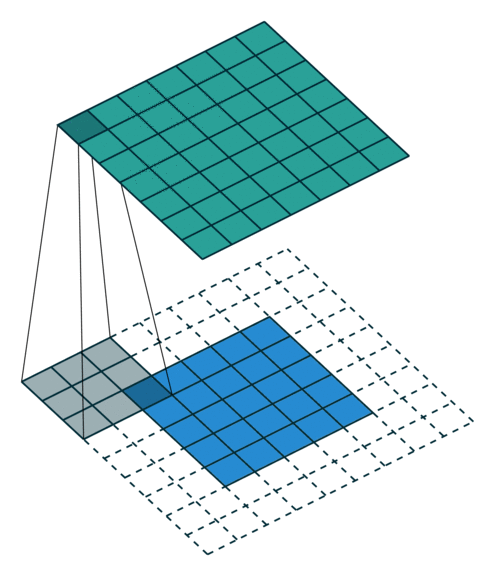

**Lớp thứ hai:**
Convolutional Layer: 256 kernels có kích thước 5x5x48 (stride size = 1, pad = 2) => 27x27x256 feature maps.

Overlapping Max Pooling 3x3 có stride =2 => feature maps = 13x13x256.

Tiếp theo là Local Response Normalization => feature maps = 13x13x256.

**Lớp thứ ba:**
Convolutional Layer: 384 kernels có kích thước 3x3x256 (stride size = 1, pad = 1) => 13x13x384 feature maps.


**Lớp thứ bốn:**
384 kernels có kích thước 3x3x192 (stride size = 1, pad = 1) => 13x13x384 feature maps.

**Lớp thứ năm:**
Convolutional Layer: 256 kernels có kích thước 3x3x192 (stride size = 1, pad = 1) => 13x13x256 feature maps.

Overlapping Max Pooling 3x3 có stride =2 => feature maps = 6x6x256.

**Lớp thứ sáu:**
Full connected l với 4096 neurals

**Lớp thứ 7:**
Full connected  với 4096 neurals

**Lớp thứ tám:**
Full connected ra output 1000 neural (do có 1000 lớp)

Cuối cùng là softmax layer cho 1000 output.

Tổng cộng, chúng ta có 60 triệu tham số được sử dụng để huấn luyện.


Các mô hình neural network trước khi bài báo AlexNet ra đời thường sử dụng hàm Tanh làm hàm kích hoạt. Mô hình AlexNet không sử dụng hàm TanH mà giới thiệu một hàm kích hoạt mới là ReLU. ReLU giúp cho quá trình huấn luyện chạy nhanh hơn gấp 6 lần so với kiến trúc tương tự sử dụng TanH, góp một phần vào việc độ lỗi trên tập huấn luyện là 25%
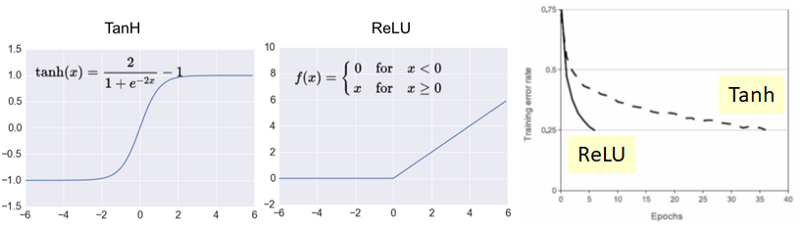


**Local Response Normalization và Batch Normalization**

Trong mạng AlexNet, nhóm tác giả sử dụng hàm chuẩn hóa là Local Response Normalization. Hàm này không phải là Batch Normalization mà các bạn hay sử dụng ở thời điểm hiện tại (xem hình ở trên, hai hàm có công thức tính toán hoàn toàn khác nhau). Việc sử dụng chuẩn hóa (Normalization) giúp tăng tốc độ hội tụ. Ngày nay, chúng ta không còn sử dụng Local Response Normalization nữa. Thay vào đó, chúng ta sử dụng Batch Normalization làm hàm chuẩn hóa.

Với việc sử dụng hàm chuẩn hóa Local Response Normalization, độ lỗi top-1 error rate giảm 1.4%, top-5 giảm 1.2%.
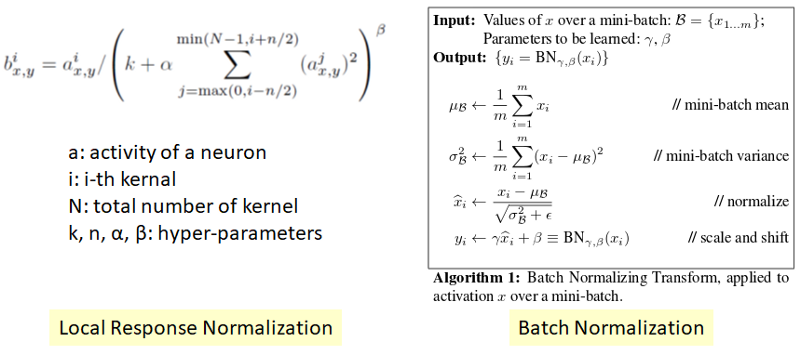

**Dropout**

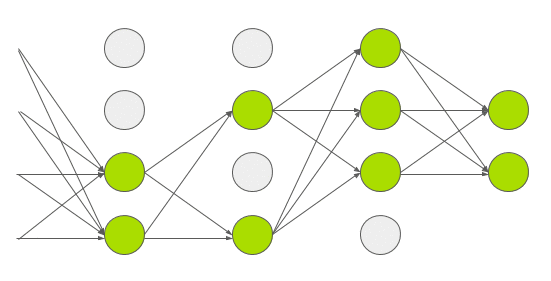

In [3]:
class CNNNet(nn.Module):

    def __init__(self, num_classes=2):
        super(CNNNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2), #64 kernel 11x11x3
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(),
            nn.Linear(4096, num_classes)
        )
    
    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

# Data

tập dữ liệu ImageNet là tập dataset có khoảng 15 triệu hình ảnh có độ phân giải cao đã được gán nhãn (có khoảng 22000 nhãn). Cuộc thi ILSVRC sử dụng một phần nhỏ của tập ImageNet với khoảng 1.2 triệu ảnh của 1000 nhãn (trung bình mỗi nhãn có khoảng 1.2 ngàn hình ảnh- khá ít) làm tập train, 50000 ảnh làm tập validation và 150000 ảnh làm tập test (tập validation và tập test đều có 1000 nhãn thuộc tập train).
=> nhóm tác giả sử dụng 1 vài trick để làm giàu dữ liệu - Data augmentation

vd: mirroring image

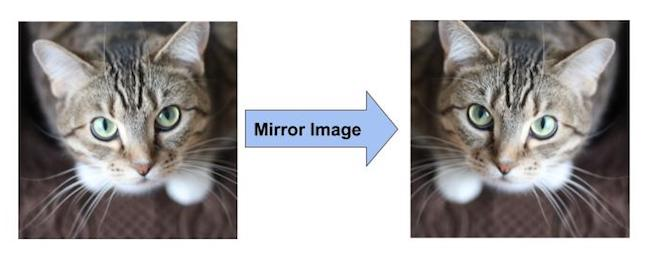

- Rotate

- random crop

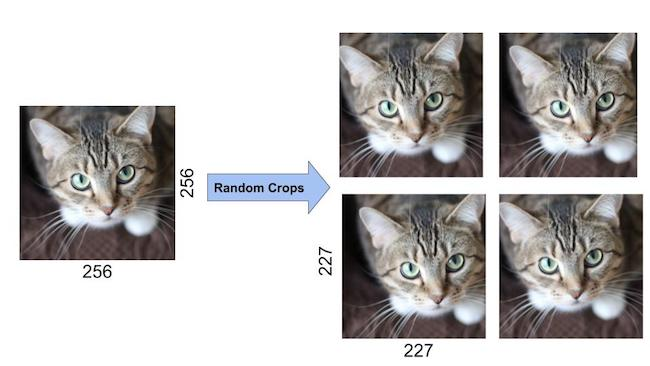

In [4]:
cnnnet = CNNNet()

In [5]:
def train(model, optimizer, loss_fn, train_loader, val_loader, epochs=20, device="cpu"):
    for epoch in range(1, epochs+1):
        training_loss = 0.0
        valid_loss = 0.0
        model.train()
        for batch in train_loader:
            optimizer.zero_grad()
            inputs, targets = batch
            inputs = inputs.to(device)
            targets = targets.to(device)
            output = model(inputs)
            loss = loss_fn(output, targets)
            loss.backward()
            optimizer.step()
            training_loss += loss.data.item() * inputs.size(0)
        training_loss /= len(train_loader.dataset)
        
        model.eval()
        num_correct = 0 
        num_examples = 0
        for batch in val_loader:
            inputs, targets = batch
            inputs = inputs.to(device)
            output = model(inputs)
            targets = targets.to(device)
            loss = loss_fn(output,targets) 
            valid_loss += loss.data.item() * inputs.size(0)
            correct = torch.eq(torch.max(F.softmax(output, dim=1), dim=1)[1],
                               targets)
            num_correct += torch.sum(correct).item()
            num_examples += correct.shape[0]
        valid_loss /= len(val_loader.dataset)

        print('Epoch: {}, Training Loss: {:.2f}, Validation Loss: {:.2f}, accuracy = {:.2f}'.format(epoch, training_loss,
        valid_loss, num_correct / num_examples))

In [12]:
def check_image(path):
    try:
        im = Image.open(path)
        return True
    except:
        return False

img_transforms = transforms.Compose([
    transforms.Resize((64,64)),    
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
    ])
train_data_path = join(PROJECT_PATH,"train")
train_data = torchvision.datasets.ImageFolder(root=train_data_path,transform=img_transforms)
val_data_path = join(PROJECT_PATH,"val")
val_data = torchvision.datasets.ImageFolder(root=val_data_path,transform=img_transforms)
batch_size=25
train_data_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,shuffle=True)
val_data_loader  = torch.utils.data.DataLoader(val_data, batch_size=batch_size, shuffle=True)

if torch.cuda.is_available():
    device = torch.device("cuda") 
else:
    device = torch.device("cpu")
cnnnet.to(device)

CNNNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU()
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
    (4)

In [13]:
optimizer = optim.Adam(cnnnet.parameters(), lr=0.001)

In [14]:
train(cnnnet, optimizer,torch.nn.CrossEntropyLoss(), train_data_loader,val_data_loader, epochs=100, device=device)

Epoch: 1, Training Loss: 0.37, Validation Loss: 0.45, accuracy = 0.79
Epoch: 2, Training Loss: 0.32, Validation Loss: 0.92, accuracy = 0.58
Epoch: 3, Training Loss: 0.31, Validation Loss: 0.77, accuracy = 0.70
Epoch: 4, Training Loss: 0.29, Validation Loss: 0.42, accuracy = 0.82
Epoch: 5, Training Loss: 0.25, Validation Loss: 0.68, accuracy = 0.68
Epoch: 6, Training Loss: 0.27, Validation Loss: 0.95, accuracy = 0.54
Epoch: 7, Training Loss: 0.26, Validation Loss: 0.50, accuracy = 0.80
Epoch: 8, Training Loss: 0.18, Validation Loss: 0.40, accuracy = 0.82
Epoch: 9, Training Loss: 0.19, Validation Loss: 0.75, accuracy = 0.68
Epoch: 10, Training Loss: 0.21, Validation Loss: 0.74, accuracy = 0.65
Epoch: 11, Training Loss: 0.32, Validation Loss: 0.34, accuracy = 0.87
Epoch: 12, Training Loss: 0.20, Validation Loss: 0.48, accuracy = 0.83
Epoch: 13, Training Loss: 0.16, Validation Loss: 0.60, accuracy = 0.81
Epoch: 14, Training Loss: 0.18, Validation Loss: 1.38, accuracy = 0.55
Epoch: 15, Trai

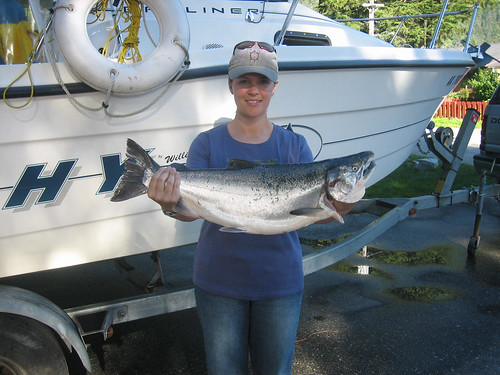

tensor([[0., 1.]], grad_fn=<SoftmaxBackward0>)
fish


In [17]:
labels = ['cat','fish']

img = Image.open("/content/drive/MyDrive/T.A/b3/cat_vs_fish/test/fish/1096796892_14ad55ba7f.jpg")
display(img)
img = img_transforms(img).to(device)
img = torch.unsqueeze(img, 0)

cnnnet.eval() #evaluation mode
prediction = F.softmax(cnnnet(img), dim=1) #pass img through neural network, get output and then pass through softmax function...
print(prediction) #probability to be cat (idx 0) or fish (idx 1)
prediction = prediction.argmax() #return index of max value (max probability)
print(labels[prediction]) #print the class respect to the index of max value prediction 

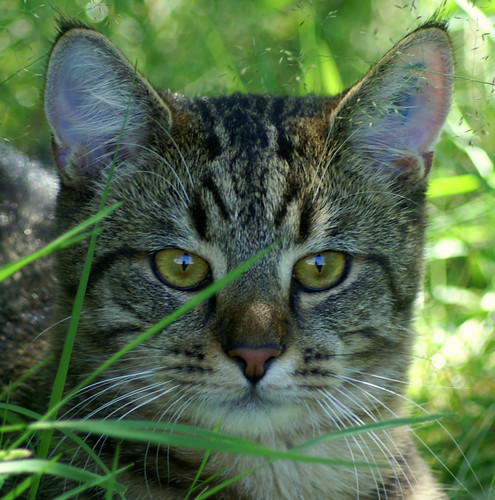

tensor([[0.9918, 0.0082]], grad_fn=<SoftmaxBackward0>)
cat


In [18]:

img = Image.open("/content/drive/MyDrive/T.A/b3/cat_vs_fish/test/cat/1129508685_d2bf1e70a5.jpg")
display(img)
img = img_transforms(img).to(device)
img = torch.unsqueeze(img, 0)

cnnnet.eval() #evaluation mode
prediction = F.softmax(cnnnet(img), dim=1) #pass img through neural network, get output and then pass through softmax function...
print(prediction) #probability to be cat (idx 0) or fish (idx 1)
prediction = prediction.argmax() #return index of max value (max probability)
print(labels[prediction]) #print the class respect to the index of max value prediction 

## Downloading a pretrained network 

In [19]:
import torchvision.models as models
alexnet = models.alexnet(num_classes=1000, pretrained=True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [21]:
print(alexnet)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [29]:
train(alexnet, optimizer,torch.nn.CrossEntropyLoss(), train_data_loader,val_data_loader, epochs=100, device=device)

Epoch: 1, Training Loss: 25.16, Validation Loss: 25.01, accuracy = 0.00
Epoch: 2, Training Loss: 25.14, Validation Loss: 25.01, accuracy = 0.00
Epoch: 3, Training Loss: 25.19, Validation Loss: 25.01, accuracy = 0.00
Epoch: 4, Training Loss: 25.10, Validation Loss: 25.01, accuracy = 0.00
Epoch: 5, Training Loss: 25.15, Validation Loss: 25.01, accuracy = 0.00
Epoch: 6, Training Loss: 25.00, Validation Loss: 25.01, accuracy = 0.00
Epoch: 7, Training Loss: 25.28, Validation Loss: 25.01, accuracy = 0.00
Epoch: 8, Training Loss: 25.16, Validation Loss: 25.01, accuracy = 0.00
Epoch: 9, Training Loss: 25.21, Validation Loss: 25.01, accuracy = 0.00
Epoch: 10, Training Loss: 25.18, Validation Loss: 25.01, accuracy = 0.00
Epoch: 11, Training Loss: 24.94, Validation Loss: 25.01, accuracy = 0.00
Epoch: 12, Training Loss: 25.20, Validation Loss: 25.01, accuracy = 0.00
Epoch: 13, Training Loss: 25.16, Validation Loss: 25.01, accuracy = 0.00
Epoch: 14, Training Loss: 25.07, Validation Loss: 25.01, acc